# Introduction




# Prepare for analysis

## Load packages

In [22]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [72]:
import importlib, modular_functions
importlib.reload(modular_functions)


<module 'modular_functions' from '/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py'>

In [48]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"

## Read the data

In [4]:
train_df = pd.read_csv(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = pd.read_csv(TEST_PATH)

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [4]:
from modular_functions import missing_summary
df_missing_train = missing_summary(train_df)
df_missing_test = missing_summary(test_df)

### Most frequent data

In [5]:
from modular_functions import frequency_summary
df_freq_train = frequency_summary(train_df)
df_freq_test = frequency_summary(test_df)
df_freq_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,NaN,0,0,347082,8.05,NaN,S
Frequency,1,549,491,1,577,177,608,678,7,43,687,644
Percent from total,0.112,61.616,55.107,0.112,64.759,24.79,68.238,76.094,0.786,4.826,336.765,72.441


### Unique values

In [6]:
from modular_functions import unique_summary
df_unique_train = unique_summary(train_df)
df_unique_test = unique_summary(test_df)

# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [24]:
from modular_functions import combine_train_test
all_df = combine_train_test(train_df, test_df)
all_df
all_df = all_df.reset_index(drop=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family Size  891 non-null    float64
 13  set          1309 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 143.3+ KB


/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


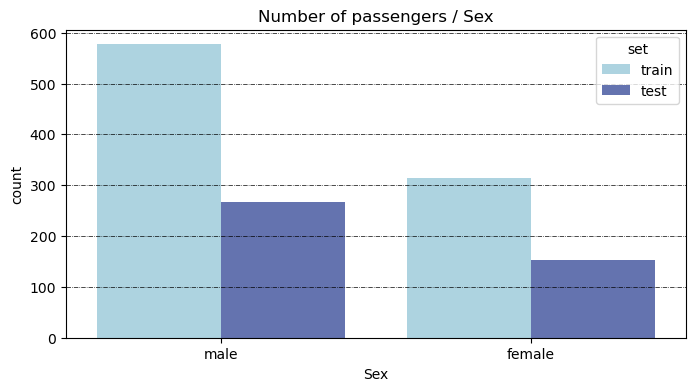

In [73]:
# Plot count pairs "Sex"
from modular_functions import plot_count_pairs, plot_distribution_pairs

plot_count_pairs(data_df=all_df,feature="Sex", title="Sex", hue="set")


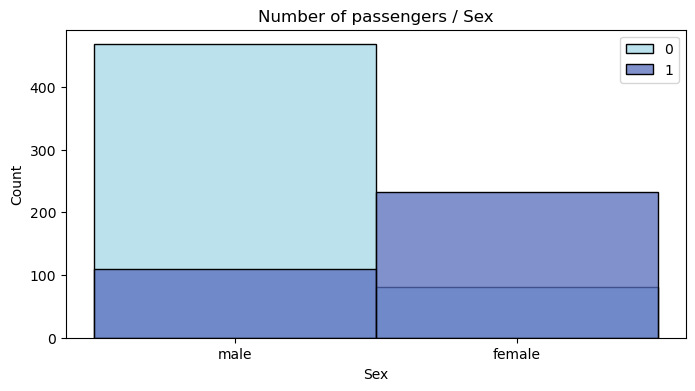

In [74]:
# Plot distribution pairs for "Sex" and hue as "Survived"
plot_distribution_pairs(data_df=train_df, feature="Sex", title="Sex", hue="Survived")

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


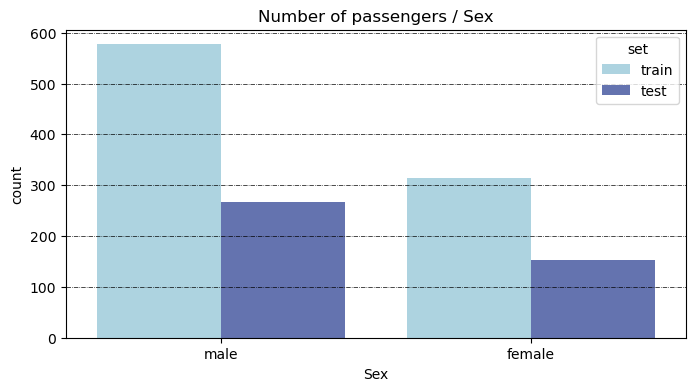

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


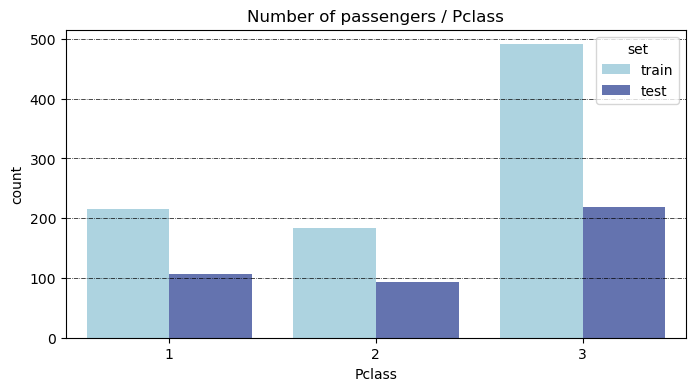

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


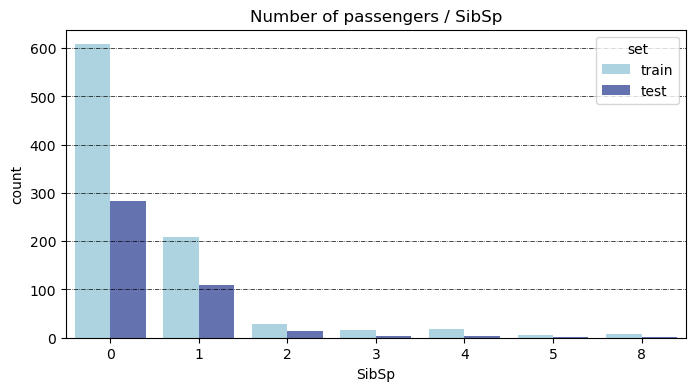

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


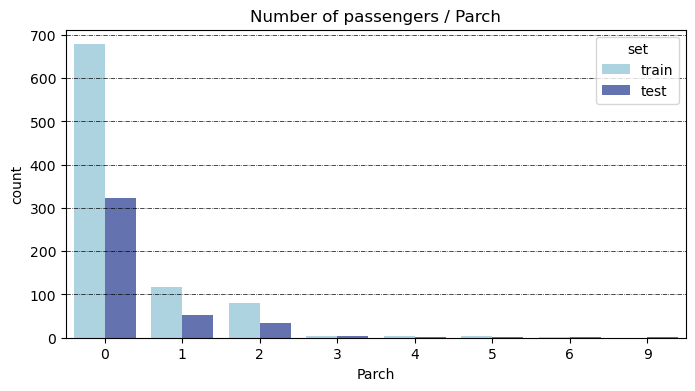

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


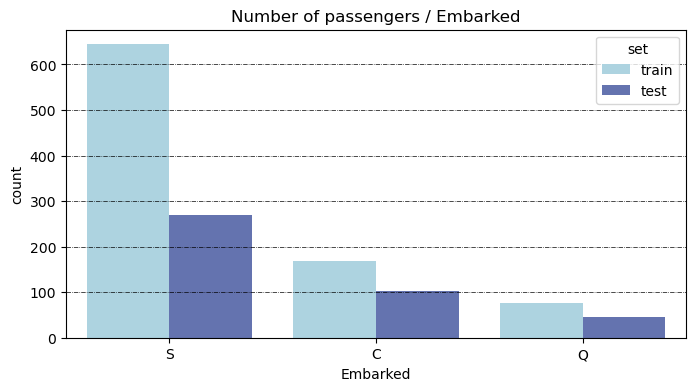

In [75]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked
features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
for feat in features:
    plot_count_pairs(data_df=all_df,feature=feat, title=feat, hue="set")

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


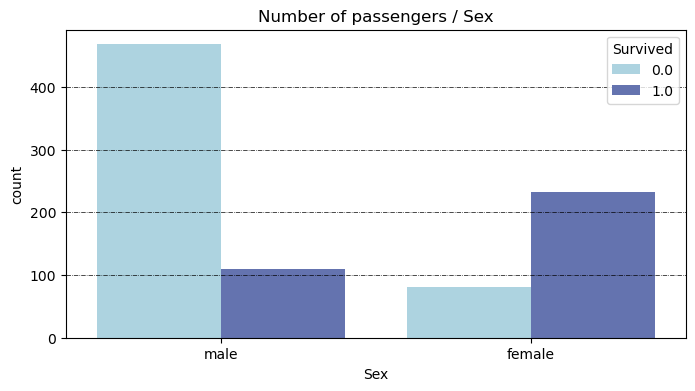

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


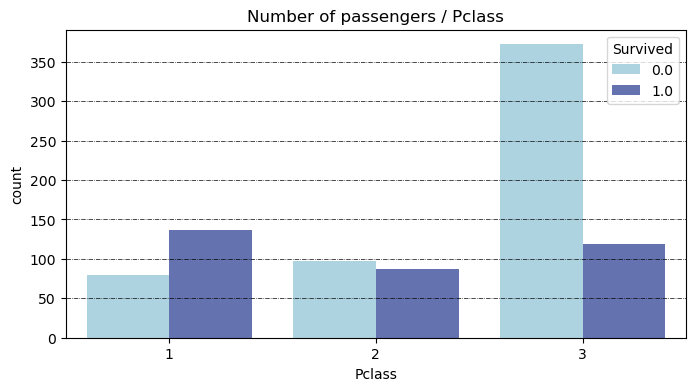

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


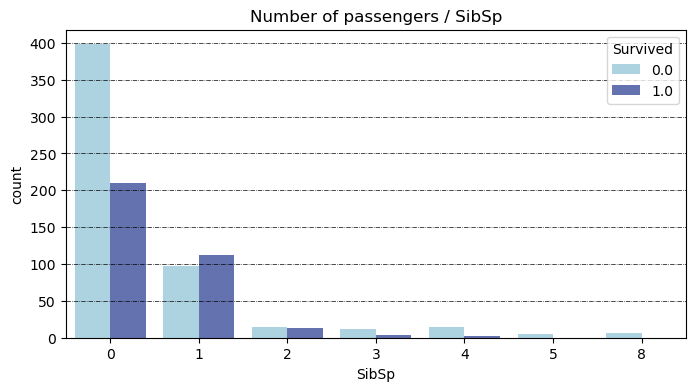

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


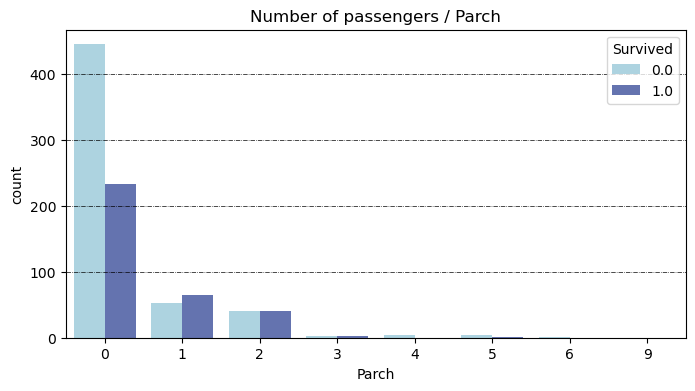

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


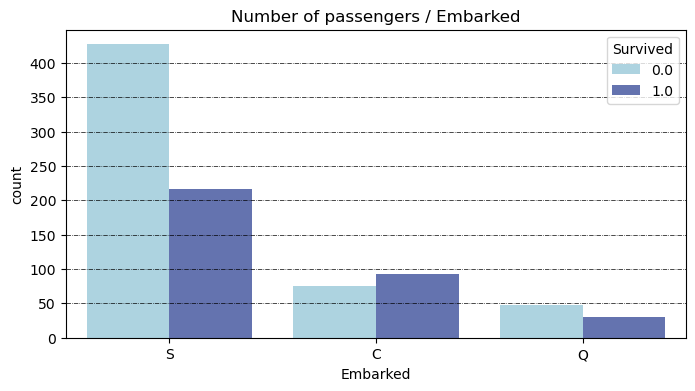

In [76]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.
features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
for feat in features:
    plot_count_pairs(data_df=all_df,feature=feat, title=feat, hue="Survived")


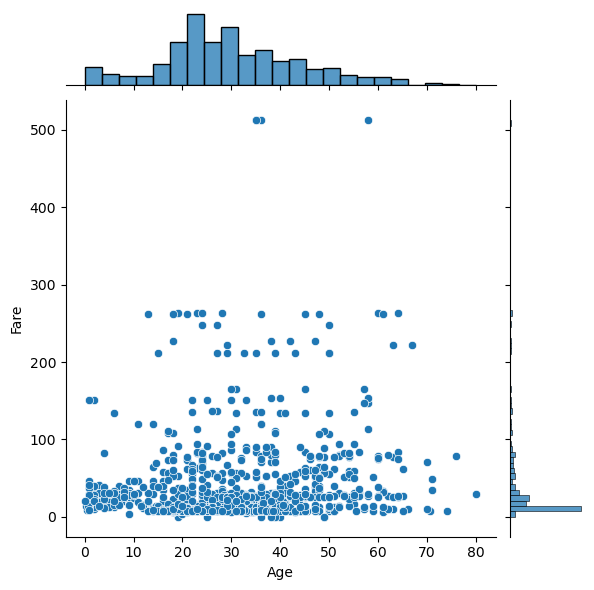

In [78]:
# Plot distribution pairs for Age and Fare
g = sns.jointplot(data=all_df, x="Age", y="Fare", kind="scatter")
g.figure.savefig(f"figures/Plot distribution pairs for Age and Fare.png", dpi=300, bbox_inches="tight")

plt.show()

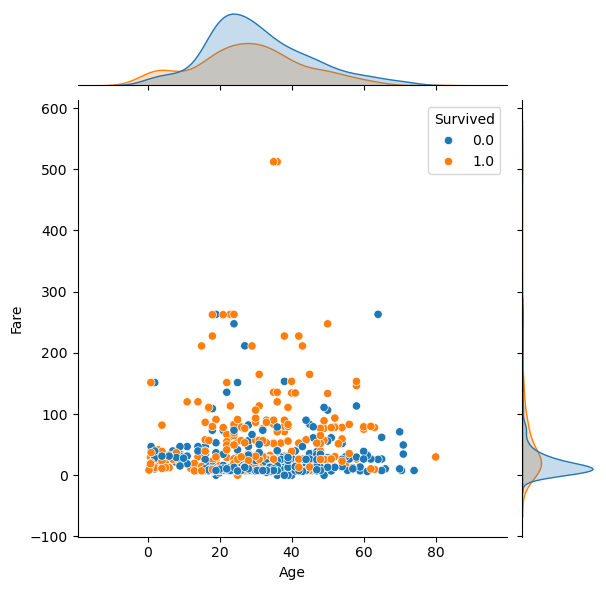

In [79]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
g = sns.jointplot(data=all_df.dropna(subset=["Age", "Fare", "Survived"]),
              x="Age", y="Fare", hue="Survived", kind="scatter")
g.figure.savefig(f"figures/Plot distribution pairs for Age and Fare by Survived.png", dpi=300, bbox_inches="tight")
plt.show()


## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [34]:
from modular_functions import family_add
all_df = family_add(all_df)
train_df = family_add(train_df)

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


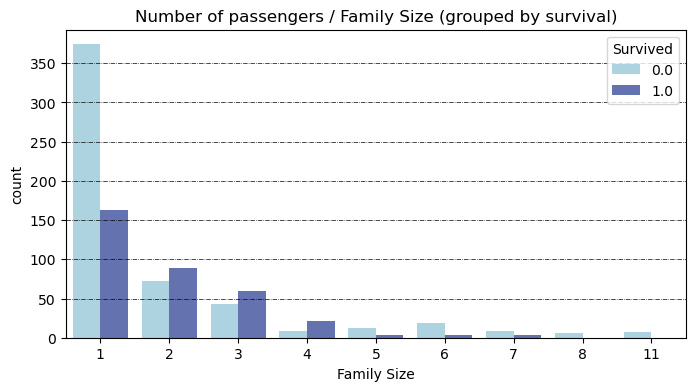

In [80]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.
plot_count_pairs(data_df=all_df,feature="Family Size", title="Family Size (grouped by survival)", hue="Survived")


## Age interval

In [36]:
from modular_functions import add_intervals
all_df = add_intervals(all_df)
train_df = add_intervals(train_df)


In [37]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,set,Age Interval,Fare Interval
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,train,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,train,2,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,train,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,train,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,train,2,1


/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


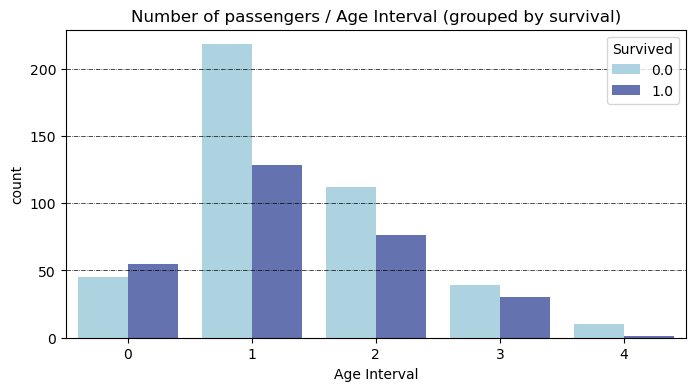

In [81]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
plot_count_pairs(data_df=all_df,feature="Age Interval", title="Age Interval (grouped by survival)", hue="Survived")


## Fare interval

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


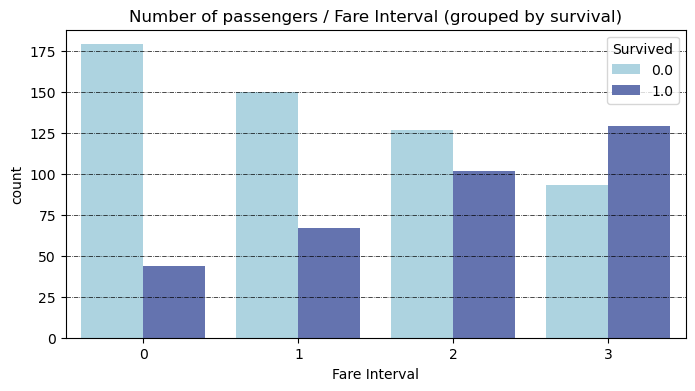

In [90]:
# Plot count pairs using all_df for the column "Fare Interval"
plot_count_pairs(data_df=all_df,feature="Fare Interval", title="Fare Interval (grouped by survival)", hue="Survived")


Let's create a composed feature: Pclass + Sex.

In [40]:
from modular_functions import add_sex_pclass
train_df = add_sex_pclass(train_df)
all_df = add_sex_pclass(all_df)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,set,Age Interval,Fare Interval,Sex_Pclass
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,train,1,0,M_C3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,train,2,3,F_C1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,train,1,1,F_C3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,train,2,3,F_C1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,train,2,1,M_C3


/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


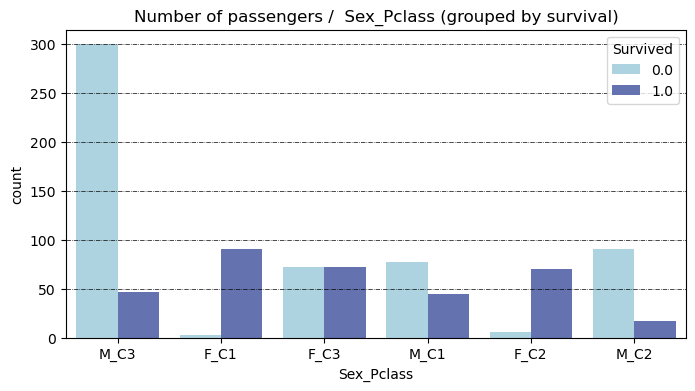

In [89]:
# Plot count pairs using all_df for the column "Sex_Pclass" and use "Survived" as hue.
plot_count_pairs(data_df=all_df,feature="Sex_Pclass", title=" Sex_Pclass (grouped by survival)", hue="Survived")


## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [42]:
from modular_functions import parse_names
from modular_functions import add_name_parts
all_df = add_name_parts(all_df)
train_df = add_name_parts(train_df)

## Multivariate analysis


Let's look now to the interaction of multiple features.

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


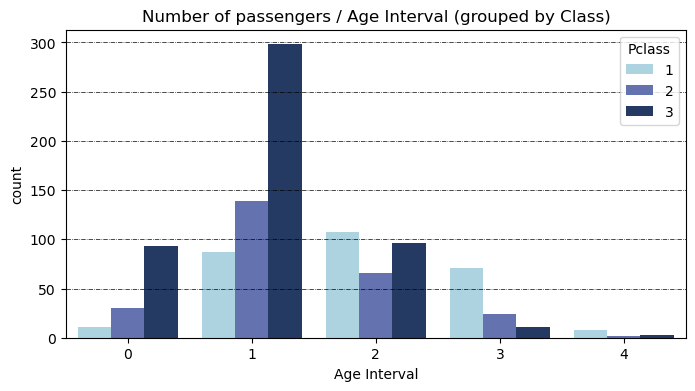

In [84]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
plot_count_pairs(all_df, "Age Interval", "Age Interval (grouped by Class)", "Pclass")

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


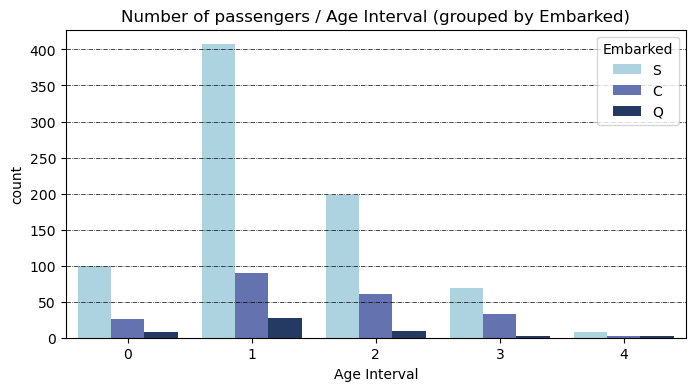

In [85]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"
plot_count_pairs(all_df, "Age Interval", "Age Interval (grouped by Embarked)", "Embarked")

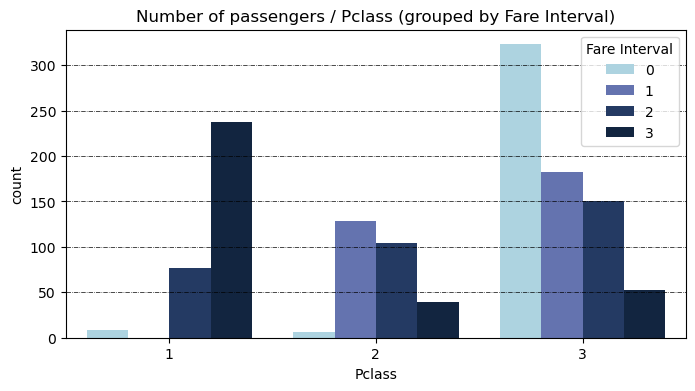

In [86]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"
plot_count_pairs(all_df, "Pclass", "Pclass (grouped by Fare Interval)", "Fare Interval")

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [ ]:
from modular_functions import add_family_and_title_features
train_df = add_family_and_title_features(train_df)
all_df = add_family_and_title_features(all_df)

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:176: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Family Size"] == 1, "Family Type"] = "Single"
/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:176: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Family Size"] == 1, "Family Type"] = "Single"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,set,Age Interval,Fare Interval,Sex_Pclass,Family Name,Title,Given Name,Maiden Name,Family Type,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,train,1,0,M_C3,Braund,Mr.,Owen Harris,None,Small,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,train,2,3,F_C1,Cumings,Mrs.,John Bradley,Florence Briggs Thayer,Small,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,train,1,1,F_C3,Heikkinen,Miss.,Laina,None,Single,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,train,2,3,F_C1,Futrelle,Mrs.,Jacques Heath,Lily May Peel,Small,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,train,2,1,M_C3,Allen,Mr.,William Henry,None,Single,Mr.


In [ ]:
# TODO: turn into function (just one liner so it's ok for now)
train_df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

,Titles,Sex,Survived
0,Master.,male,0.575000
1,Miss.,female,0.702703
2,Mr.,male,0.156673
3,Mrs.,female,0.793651
4,Rare,female,1.000000
5,Rare,male,0.250000


In [91]:
summary = (
    train_df[["Titles", "Sex", "Survived"]]
    .groupby(["Titles", "Sex"], as_index=False)
    .agg(
        mean_survival=("Survived", "mean"),
        count=("Survived", "size"),
    )
)
summary

,Titles,Sex,mean_survival,count
0,Master.,male,0.575000,40
1,Miss.,female,0.702703,185
2,Mr.,male,0.156673,517
3,Mrs.,female,0.793651,126
4,Rare,female,1.000000,3
5,Rare,male,0.250000,20


In [92]:
rare_missing = all_df[(all_df["Titles"] == "Rare") & (all_df["Survived"].isna())]
rare_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,set,Age Interval,Fare Interval,Sex_Pclass,Family Name,Title,Given Name,Maiden Name,Family Type,Titles
1022,1023,NaN,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,...,test,3,2,M_C1,Gracie,Col.,Archibald IV,None,Single,Rare
1040,1041,NaN,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,...,test,1,2,M_C2,Lahtinen,Rev.,William,None,Small,Rare
1055,1056,NaN,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,...,test,2,1,M_C2,Peruschitz,Rev.,Joseph Maria,None,Single,Rare
1093,1094,NaN,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,...,test,2,3,M_C1,Astor,Col.,John Jacob,None,Small,Rare
1184,1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,...,test,3,3,M_C1,Dodge,Dr.,Washington,None,Small,Rare
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,test,2,3,F_C1,Oliva y Ocana,Dona.,Fermina,None,Single,Rare


/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


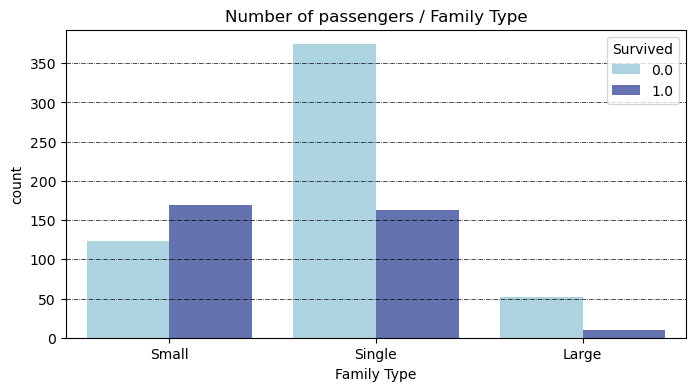

In [94]:
plot_count_pairs(all_df, "Family Type", "Family Type", "Survived")

/Users/limrenjie/Desktop/MPhil/D100/ps1_ex4_nb_to_repo/modular_functions.py:236: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


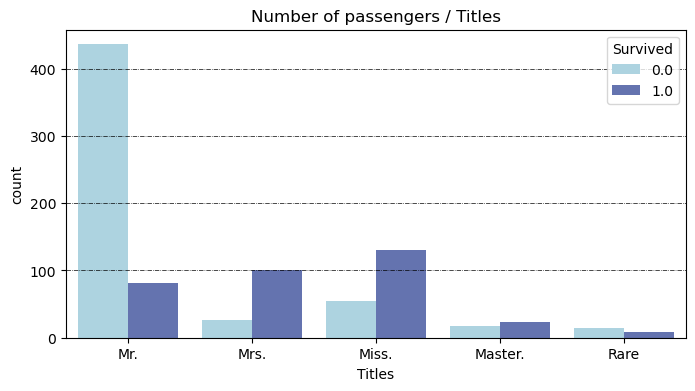

In [96]:
plot_count_pairs(all_df, "Titles", "Titles", "Survived")

# Baseline model

## Feature engineering: Map categorical value to numerical values

In [52]:
from modular_functions import encode_sex
train_df = encode_sex(train_df)
test_df = encode_sex(test_df)

Create train-validation split.

In [95]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

valid.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family Size,Age Interval,Fare Interval,Sex_Pclass,Family Name,Title,Given Name,Maiden Name,Family Type,Titles
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,...,3,NaN,2,M_C3,Moubarek,Master.,Halim Gonios,"""William George""",Small,Master.
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,...,1,1,1,M_C2,Kvillner,Mr.,Johan Henrik Johannesson,None,Single,Mr.
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,...,1,1,1,M_C3,Alhomaki,Mr.,Ilmari Rudolf,None,Single,Mr.
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,...,2,0,3,F_C2,Harper,Miss.,"Annie Jessie ""Nina""",None,Small,Miss.
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,...,2,0,1,F_C3,Nicola-Yarred,Miss.,Jamila,None,Small,Miss.


Define predictor features and target feature.

In [54]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [55]:
from modular_functions import get_features 
from modular_functions import get_target

train_X = get_features(train, predictors)
train_Y = get_target(train, target)

valid_X = get_features(valid, predictors)
valid_Y = get_target(valid, target)



Initialize the classifiction algorithm.

In [69]:
from modular_functions import train_and_predict_rf
out = train_and_predict_rf(train_X, train_Y, valid_X)
preds_tr = out["preds_tr"]
preds = out["preds_val"]

Fit the classifier with the training data.

Predict the train data (to check the training classification error).

Predict the validation data.

# Evaluation

## Classification report for training data.

In [70]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



Classification report for validation data.

In [66]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179



In [87]:
all_df.to_csv("all_data.csv", index=False)
